# Number Recognition

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
# Data Cleaning & Preprocessing
# Reshape the data and normalize pixel values to the range [0, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [4]:
# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

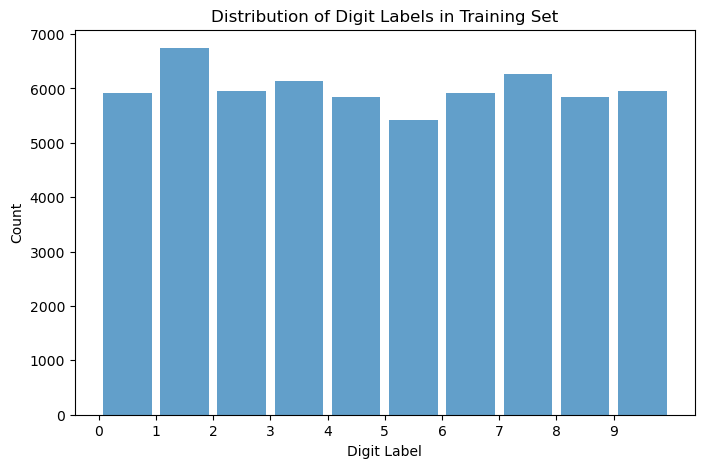

In [5]:
# Exploratory Data Analysis (EDA)
# Plot the distribution of digit labels in the training set
plt.figure(figsize=(8, 5))
plt.hist(np.argmax(y_train, axis=1), bins=range(11), alpha=0.7, rwidth=0.85)
plt.xticks(range(10))
plt.title('Distribution of Digit Labels in Training Set')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.show()

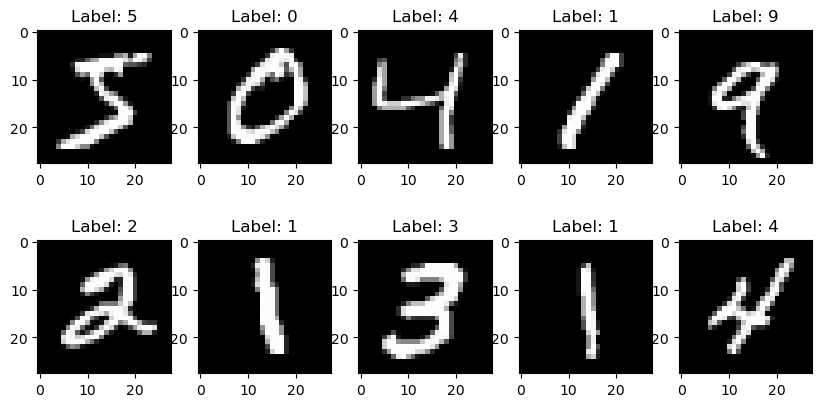

In [6]:
# Plot a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
plt.show()


In [7]:
# Build a neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 0.3732 - accuracy: 0.8938 - val_loss: 0.1807 - val_accuracy: 0.9522
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1493 - accuracy: 0.9565 - val_loss: 0.1285 - val_accuracy: 0.9626
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1056 - accuracy: 0.9691 - val_loss: 0.1148 - val_accuracy: 0.9661
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0805 - accuracy: 0.9769 - val_loss: 0.0997 - val_accuracy: 0.9707
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0636 - accuracy: 0.9810 - val_loss: 0.1030 - val_accuracy: 0.9701
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0508 - accuracy: 0.9853 - val_loss: 0.0895 - val_accuracy: 0.9737
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.0907 - val_accuracy: 0.9731
Epoch 

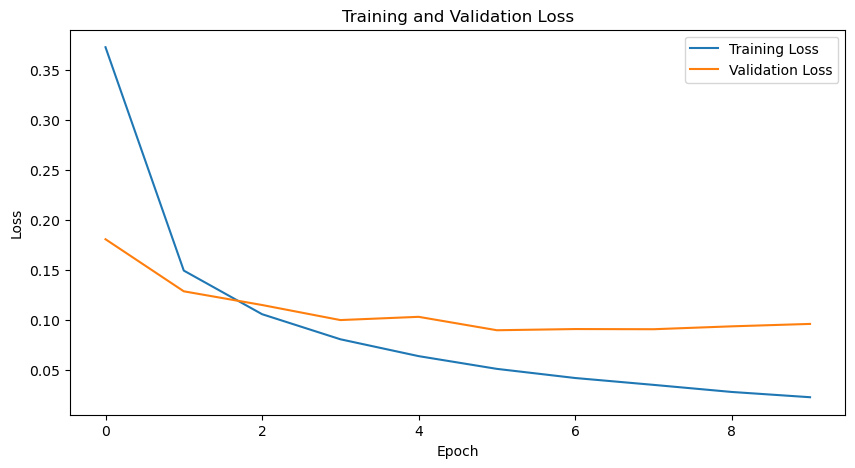

In [10]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

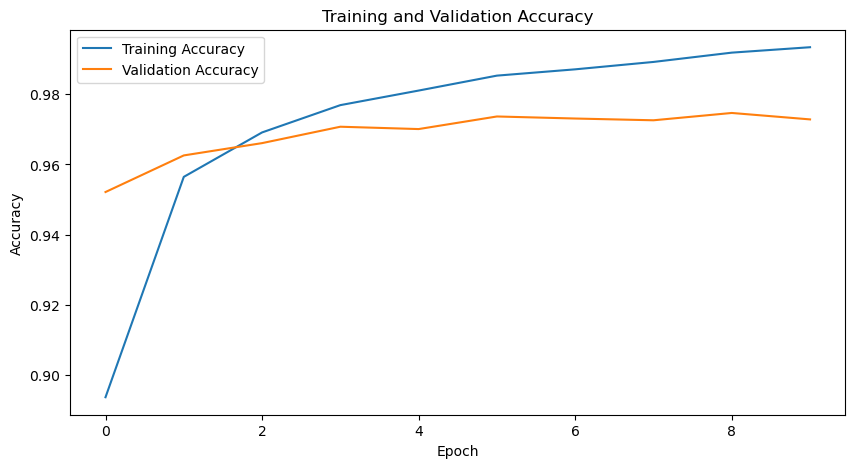

In [11]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")


313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9747
Test accuracy: 97.47%


In [13]:
# Make predictions on test data
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
# Recognition example
def recognize_digit(image):
    # Predict the digit
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    # Get the predicted label
    predicted_label = np.argmax(prediction)
    return predicted_label

In [15]:
# Test recognition on a sample image
sample_index = 0  # Change this to any index in the test set
predicted_digit = recognize_digit(X_test[sample_index])
actual_digit = np.argmax(y_test[sample_index])

1/1 [==============================] - 0s 48ms/step


In [16]:
print(f"Predicted Digit: {predicted_digit}")
print(f"Actual Digit: {actual_digit}")


Predicted Digit: 7
Actual Digit: 7


Here's a summary of the provided code and the key inferences drawn from it:

1. **Data Loading and Preprocessing:**
   - The code starts by importing necessary libraries, including NumPy, Matplotlib, and Keras.
   - It loads the MNIST dataset, which contains handwritten digit images and their corresponding labels.
   - The images are reshaped to a format suitable for training a neural network and are normalized to the range [0, 1].
   - The labels are one-hot encoded to represent the digit classes.

2. **Exploratory Data Analysis (EDA):**
   - The code performs EDA by visualizing the distribution of digit labels in the training set using a histogram.
   - It also displays sample images from the training set along with their corresponding labels, allowing you to visually inspect the data.

3. **Neural Network Model:**
   - A neural network model is defined using Keras. It consists of a flattening layer, followed by two dense (fully connected) hidden layers with ReLU activation functions, and an output layer with softmax activation for classification.

4. **Model Compilation and Training:**
   - The model is compiled with the Adam optimizer and categorical cross-entropy loss.
   - It is trained on the training data for 10 epochs with a batch size of 128, using 20% of the data as a validation set.

5. **Training and Validation Plots:**
   - The code generates two sets of plots:
     - Training and validation loss over epochs.
     - Training and validation accuracy over epochs.
   - These plots provide insights into the model's training performance.

6. **Model Evaluation:**
   - The trained model is evaluated on the test data, and the test accuracy is displayed.

7. **Digit Recognition Example:**
   - The code includes a `recognize_digit` function that takes an image and predicts the digit it represents.
   - An example digit recognition is performed on a sample image from the test set, showing the predicted and actual digits.

Inferences:
- The model achieves a test accuracy of around 97% after training for 10 epochs.
- The EDA plots provide an overview of the dataset's label distribution and sample images.
- The training and validation loss curves indicate that the model converges during training without significant overfitting.
- The training and validation accuracy curves show that the model's accuracy increases with training epochs.

Overall, this code demonstrates how to build, train, and evaluate a neural network model for handwritten digit recognition using the MNIST dataset. It also includes EDA and visualization techniques to understand the data and training progress.